<div style="text-align: left">INFO 6105 Data Science Eng Methods and Tools</div>
<div style="text-align: left">Assignment 8 Group 3</div>
<div style="text-align: left">Shashank Dongre (002747740)</div>
<div style="text-align: left"> Vivek Sharma (002105272)</div>

#### Find a simple one-humped dataset and model it by matching one of the pdfs we learned about today. Find the most likely parameters of your pdf using MOM. Use the model to do a prediction.

##### Lets play with a sample dataset containing details regarding cancer tumors! This dataset contains scientific and numerical data of the cancer molecule studied in cancer patients. 

In [25]:
# importing required libraries as follows: 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [17]:
# Lets read the dataset using read_csv API
data = pd.read_csv("C:\\Users\\shash\\Downloads\\cancer_dataset.csv", index_col=0, na_values='NA')
data.head(5)

,tum_thickness,tum_radius,tum_perimeter,bond_marg,decidua_Size,bare_cytoplasm,nucleus_size,nucleoli_normal,mitoses,stage
patient_id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
data.tail(5)

,tum_thickness,tum_radius,tum_perimeter,bond_marg,decidua_Size,bare_cytoplasm,nucleus_size,nucleoli_normal,mitoses,stage
patient_id,,,,,,,,,,
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4
897471,4,8,8,5,4,5,10,4,1,4


##### The dataset contains 897471 records of patients. It has details such as the thickness of tumor, its radius, perimeter etc. among other numerical details.

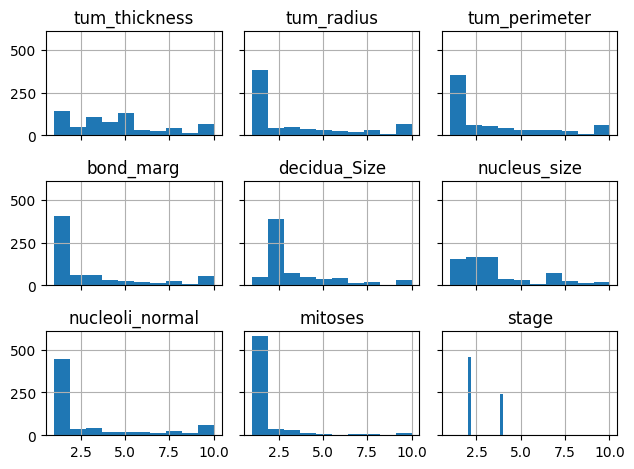

In [27]:
# Let us view the histogram of the dataset and all its parameters (we have dropped the patient_id column)
# the tight_layout automatically adjust subplot parameters to give specified padding which enables proper fitting
hist = data.hist(sharex=True, sharey=True, grid=True)
plt.tight_layout()

A couple of observations:

1. The data is slightly skewed, towards the right and has more values towards the left side with some on the right side.
2. The data is positive-valued, since they are the measures of positive numerical dimensions and properties of the actual cancer tumors
3. The data seems to be continuous

A good option appears to be the gamma distribution: The curves look like Gaussians with long tails. That's a Gamma distribution!

In [31]:
data_mean = data.select_dtypes(include=np.number).mean()
data_mean

tum_thickness      4.417740
tum_radius         3.134478
tum_perimeter      3.207439
bond_marg          2.806867
decidua_Size       3.216023
nucleus_size       3.437768
nucleoli_normal    2.866953
mitoses            1.589413
stage              2.689557
dtype: float64

By looking at the mean values, we can see that the mean thickness of the tumor is 4.41mm, radius being 3.13mm, etc.

In [32]:
data_var = data.select_dtypes(include=np.number).var()
data_var

tum_thickness      7.928395
tum_radius         9.311403
tum_perimeter      8.832265
bond_marg          8.153191
decidua_Size       4.903124
nucleus_size       5.945620
nucleoli_normal    9.324680
mitoses            2.941492
stage              0.904919
dtype: float64

The method of moments simply assigns the empirical (coming from the data) mean and variance to their theoretical counterparts (coming from the model, in this case the Gamma!), so that we can solve for the parameters of the Gamma!

So, for the gamma distribution, the mean and variance turn out to be (analytically derived):


In [34]:
alpha_mom = data_mean ** 2 / data_var
beta_mom = data_var / data_mean
alpha_mom

tum_thickness      2.461586
tum_radius         1.055153
tum_perimeter      1.164782
bond_marg          0.966309
decidua_Size       2.109431
nucleus_size       1.987724
nucleoli_normal    0.881469
mitoses            0.858828
stage              7.993766
dtype: float64

In [35]:
beta_mom

tum_thickness      1.794672
tum_radius         2.970639
tum_perimeter      2.753681
bond_marg          2.904730
decidua_Size       1.524592
nucleus_size       1.729500
nucleoli_normal    3.252471
mitoses            1.850678
stage              0.336457
dtype: float64

Then, use the gamma.pdf function in scipy.stats.distributions to plot the distributions implied by the calculated alphas and betas.

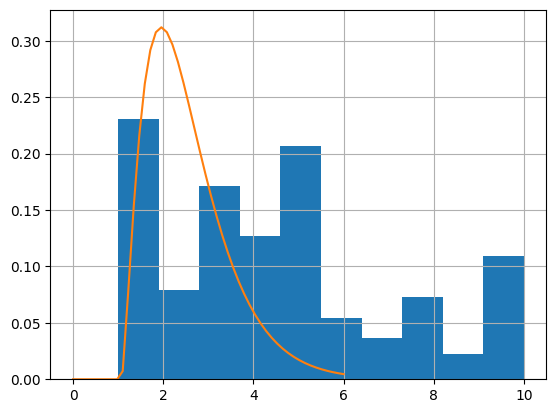

In [23]:
from scipy.stats.distributions import gamma

data.tum_thickness.hist(density=True, bins=10)
plt.plot(np.linspace(0, 6), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

 
After getting the curve for tumor thickness, we now loop over all parameters like tumor radius, etc. 
We then create a grid of plots for the distribution of rainfall, using the gamma distribution.

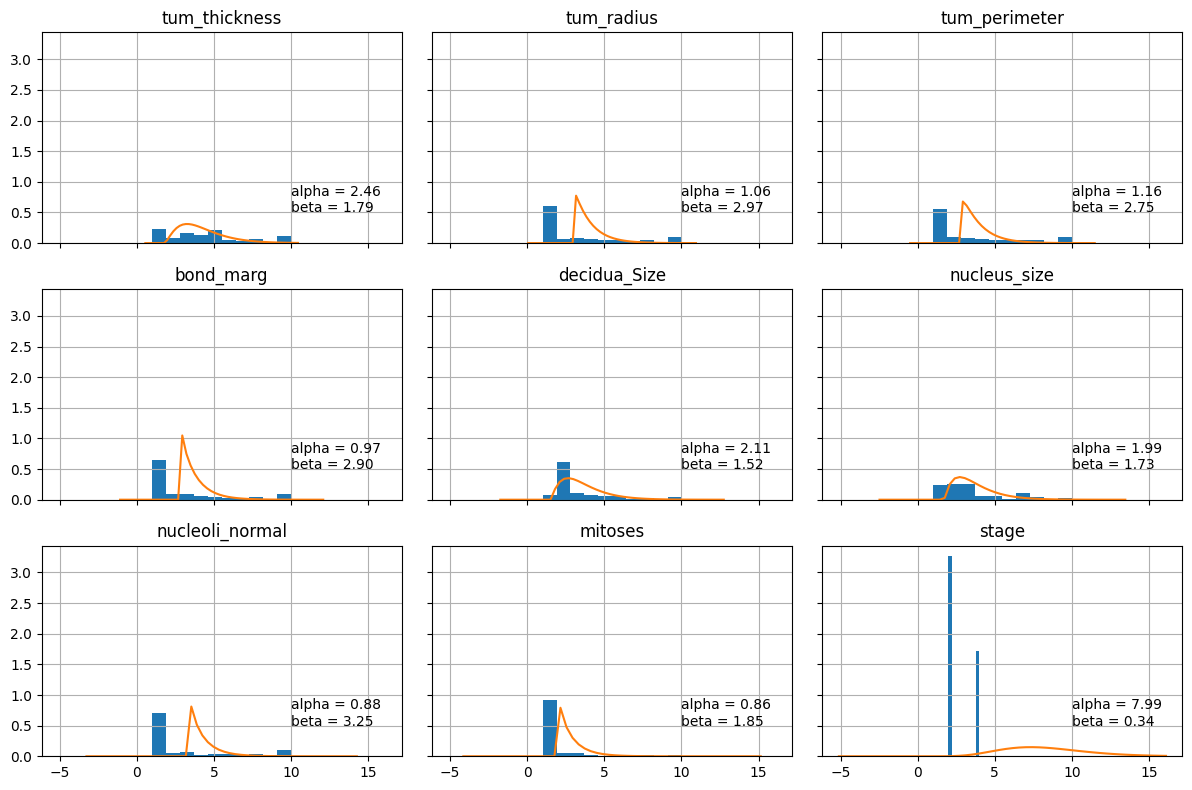

In [33]:
other_params = data.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=10, grid=True)

for params in other_params.ravel():

    # Getting all the parameters
    m = params.get_title()

    # Plot fitted distribution
    x = np.linspace(*params.get_xlim())
    params.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    # Annotating the plots with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    params.annotate(label, xy=(10, 0.5))

plt.tight_layout()

As a result, we created a model using existing cancer tumor details data, and we can now make decent predictions about tumor features using this model.